# 1. Dataset Cleaning

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [15]:
df_news = pd.read_csv('../input/news_dataset_2016.csv', encoding='cp1252')
df_news.head()

Unnamed: 0                                            message  angry_count  \
0           1  bernie sanders will stump hillary clinton labo...           51   
1           2  s starting look like political disaster via lo...           19   
2           3  mother teresa’s official name saint will st te...           17   
3           4                                       living saint           41   
4           5  distasteful actions actions protected constitu...          106   

   haha_count  love_count  sad_count  wow_count  likes_count  shares_count  \
0          75         126         22          7         1676           168   
1         213          48          6         16          804           134   
2           3          45          3          2          481            24   
3           8         164          3          8         1331           193   
4          69          19          7         17          572           123   

   comments_count  
0             318  
1             351  
2              24  
3              70  
4             526

In [16]:
df_news.shape

(12281, 10)

Dropping irrelevant columns.

In [17]:
to_drop = ['Unnamed: 0', 'shares_count', 'comments_count', 'likes_count']
df_news.drop(columns=to_drop, inplace=True)

Removing na rows and rows which contain no emotions. 

In [18]:
df_news.dropna(inplace=True)
emotions = ['angry_count', 'haha_count', 'love_count', 'sad_count', 'wow_count']
df_news = df_news[~(df_news[emotions] == 0).all(axis=1)]

Removing duplicates from dataframe.

In [19]:
df_news.drop_duplicates(inplace=True)

Checking data types.

In [20]:
df_news.dtypes

message        object
angry_count     int64
haha_count      int64
love_count      int64
sad_count       int64
wow_count       int64
dtype: object

Detecting outliers.

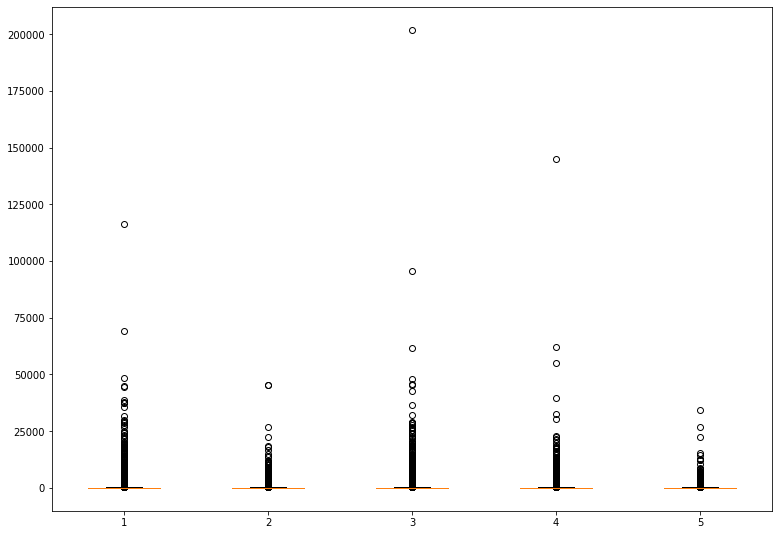

In [21]:
data = [df_news['angry_count'], df_news['haha_count'], df_news['love_count'], df_news['sad_count'], df_news['wow_count']]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot(data)
plt.show()

Removing rows containing an outlier in any of the columns.

In [22]:
df_news = df_news[(np.abs(stats.zscore(df_news[emotions])) < 3).all(axis=1)]

In [24]:
df_news.head()

message  angry_count  haha_count  \
0  bernie sanders will stump hillary clinton labo...           51          75   
1  s starting look like political disaster via lo...           19         213   
2  mother teresa’s official name saint will st te...           17           3   
3                                       living saint           41           8   
4  distasteful actions actions protected constitu...          106          69   

   love_count  sad_count  wow_count  
0         126         22          7  
1          48          6         16  
2          45          3          2  
3         164          3          8  
4          19          7         17

About 550 rows were removed from dataset (4%).

In [25]:
df_news.shape

(11723, 6)

In [26]:
df_news.to_pickle("./pkl/news/document_by_emotion_df.pkl")